In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from IPython.display import Image 
from IPython.display import IFrame
import pydot_ng as pydot 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.impute import MissingIndicator

In [543]:
df = pd.read_csv('heloc_dataset_v1.csv')
missing_indices = {}
for col in df.columns:
    missing_indices[col] = df.index[df[col] == -9].tolist()
    filtered_data = df[df['NumTradesOpeninLast12M'] != -9]


do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only')),
                                  ("add features for -9", MissingIndicator(missing_values=-9, features='missing-only'))])
 
pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -9 with -8", SimpleImputer(missing_values=-9, strategy='constant', fill_value=-8)),       
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

X  = filtered_data.iloc[:, 1:]
Y = filtered_data.iloc[:, 0]
Y.replace(('Bad', 'Good'), (1, 0), inplace=True)
print(X.shape,Y.shape)

(9871, 23) (9871,)


In [30]:
arr_X = pipeline.fit_transform( pipeline.fit_transform(X))
from sklearn.impute import MissingIndicator
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(X)
col_names_minus_7 = X.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7))

minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(X)
col_names_minus_8 = X.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))

minus_9_indicator_transformer = MissingIndicator(missing_values=-9, features='missing-only').fit(X)
col_names_minus_9 = X.columns.values[minus_9_indicator_transformer.features_].tolist() 
col_names_minus_9 = list(map(lambda s:str(s)+'=-9',col_names_minus_9))

columns_all = X.columns.values.tolist() + col_names_minus_7 + col_names_minus_8 + col_names_minus_9
X_t = pd.DataFrame(arr_X,columns = columns_all)
X_t_columns = X_t.columns


In [31]:
feature_names = X_t_columns
selected_features = ['ExternalRiskEstimate', 'NumSatisfactoryTrades',
       'MaxDelq2PublicRecLast12M', 'MSinceMostRecentInqexcl7days',
       'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NumRevolvingTradesWBalance',
       'NumBank2NatlTradesWHighUtilization']
selected_indices = [list(feature_names).index(feature) for feature in selected_features]
filtered_df = pd.DataFrame(X_t).iloc[:, selected_indices]
filtered_df.columns = selected_features
filtered_df.head()

,ExternalRiskEstimate,NumSatisfactoryTrades,MaxDelq2PublicRecLast12M,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization
0,55.0,20.0,3.0,0.0,0.0,0.0,8.0,1.00000
1,61.0,2.0,0.0,0.0,0.0,0.0,0.0,1.09227
2,67.0,9.0,7.0,0.0,4.0,4.0,4.0,1.00000
3,66.0,28.0,6.0,0.0,5.0,4.0,6.0,3.00000
4,81.0,12.0,7.0,0.0,1.0,1.0,3.0,0.00000


In [32]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
scores_lda = cross_val_score(lda, filtered_df, Y, cv=5)
print('lda:')
print('Average score: {:.4f}'.format(scores_lda.mean()))
print('Score standard deviation: {:.2f}'.format(scores_lda.std()))

lda:
Average score: 0.7262
Score standard deviation: 0.02


In [573]:
filtered_df

,ExternalRiskEstimate,NumSatisfactoryTrades,MaxDelq2PublicRecLast12M,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization
0,55.0,20.0,3.0,0.0,0.0,0.0,8.0,1.00000
1,61.0,2.0,0.0,0.0,0.0,0.0,0.0,1.09227
2,67.0,9.0,7.0,0.0,4.0,4.0,4.0,1.00000
3,66.0,28.0,6.0,0.0,5.0,4.0,6.0,3.00000
4,81.0,12.0,7.0,0.0,1.0,1.0,3.0,0.00000
...,...,...,...,...,...,...,...,...
9866,73.0,21.0,6.0,7.0,0.0,0.0,5.0,0.00000
9867,65.0,11.0,6.0,1.0,1.0,1.0,2.0,1.00000
9868,74.0,18.0,6.0,3.0,4.0,4.0,5.0,0.00000
9869,72.0,42.0,6.0,6.0,0.0,0.0,4.0,0.00000


In [575]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda.fit(filtered_df,Y)

a = lda.coef_
b = lda.intercept_

columns = filtered_df.columns

# 构建线性公式
linear_formula = "y = "
for i, coef in enumerate(a[0]):
    coef = round(coef, 2)  # 保留两位小数
    linear_formula += f"{coef}*{columns[i]} + "
linear_formula += str(round(b[0], 2))  # 保留两位小数

print(linear_formula)

y = -0.1*ExternalRiskEstimate + -0.04*NumSatisfactoryTrades + -0.01*MaxDelq2PublicRecLast12M + -0.05*MSinceMostRecentInqexcl7days + 0.15*NumInqLast6M + -0.09*NumInqLast6Mexcl7days + 0.02*NumRevolvingTradesWBalance + 0.14*NumBank2NatlTradesWHighUtilization + 8.41


In [577]:
from tabulate import tabulate


# 假设 columns 是列名，a 是系数，b 是截距项
columns = filtered_df.columns
a = lda.coef_
b = lda.intercept_

# 将列名、系数和截距项组合为一个列表
data = list(zip(columns, a[0]))
data.append(('Intercept (β0)', b[0]))  # 添加截距项

# 打印表格
table = tabulate(data, headers=['Columns', 'Coefficient'], tablefmt='grid')
print(table)

+------------------------------------+---------------+
| Columns                            |   Coefficient |
+====================================+===============+
| ExternalRiskEstimate               |    -0.104973  |
+------------------------------------+---------------+
| NumSatisfactoryTrades              |    -0.0402378 |
+------------------------------------+---------------+
| MaxDelq2PublicRecLast12M           |    -0.0137532 |
+------------------------------------+---------------+
| MSinceMostRecentInqexcl7days       |    -0.0519703 |
+------------------------------------+---------------+
| NumInqLast6M                       |     0.148146  |
+------------------------------------+---------------+
| NumInqLast6Mexcl7days              |    -0.0878264 |
+------------------------------------+---------------+
| NumRevolvingTradesWBalance         |     0.0186811 |
+------------------------------------+---------------+
| NumBank2NatlTradesWHighUtilization |     0.139597  |
+---------

In [271]:
import pickle
with open('lda_model.p', 'wb') as f:
    pickle.dump(lda, f)

In [272]:
lda.predict([[1,2,3,4,5,6,7,8]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [273]:
filtered_df.columns

Index(['ExternalRiskEstimate', 'NumSatisfactoryTrades',
       'MaxDelq2PublicRecLast12M', 'MSinceMostRecentInqexcl7days',
       'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NumRevolvingTradesWBalance',
       'NumBank2NatlTradesWHighUtilization'],
      dtype='object')

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1234)
data = data[filtered_df.columns]
# 标准化数据
scaler_data = StandardScaler()
data_scaled = scaler_data.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
# 使用PCA进行降维
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_scaled)

# 将主成分转换为DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3","PC4"])
principal_df
components

array([[-0.3365297 ,  0.3110029 , -0.17587074, -0.08663227,  0.47229811,
         0.47327682,  0.41717476,  0.36124514],
       [ 0.00913248, -0.35063341,  0.03757499, -0.15669528,  0.47819124,
         0.47695355, -0.45632796, -0.43199625],
       [ 0.59989505,  0.27235865,  0.68687984,  0.09918057,  0.17799215,
         0.17759798,  0.08813912,  0.11539171],
       [-0.05133355,  0.08481703, -0.14675574,  0.96201491,  0.0992413 ,
         0.09849279, -0.07440842, -0.13444231],
       [ 0.17359257,  0.75471046, -0.31516359, -0.17992677, -0.02127843,
        -0.02144108, -0.10590049, -0.50640755]])

In [304]:
components = pca.components_
# 输出主成分计算公式
for i, component in enumerate(components, start=1):
    formula = " + ".join(f"{coef:.3f} * {feature}" for coef, feature in zip(component, filtered_df.columns))
    print(f"PCA{i} = {formula}")

PCA1 = -0.337 * ExternalRiskEstimate + 0.311 * NumSatisfactoryTrades + -0.176 * MaxDelq2PublicRecLast12M + -0.087 * MSinceMostRecentInqexcl7days + 0.472 * NumInqLast6M + 0.473 * NumInqLast6Mexcl7days + 0.417 * NumRevolvingTradesWBalance + 0.361 * NumBank2NatlTradesWHighUtilization
PCA2 = 0.009 * ExternalRiskEstimate + -0.351 * NumSatisfactoryTrades + 0.038 * MaxDelq2PublicRecLast12M + -0.157 * MSinceMostRecentInqexcl7days + 0.478 * NumInqLast6M + 0.477 * NumInqLast6Mexcl7days + -0.456 * NumRevolvingTradesWBalance + -0.432 * NumBank2NatlTradesWHighUtilization
PCA3 = 0.600 * ExternalRiskEstimate + 0.272 * NumSatisfactoryTrades + 0.687 * MaxDelq2PublicRecLast12M + 0.099 * MSinceMostRecentInqexcl7days + 0.178 * NumInqLast6M + 0.178 * NumInqLast6Mexcl7days + 0.088 * NumRevolvingTradesWBalance + 0.115 * NumBank2NatlTradesWHighUtilization
PCA4 = -0.051 * ExternalRiskEstimate + 0.085 * NumSatisfactoryTrades + -0.147 * MaxDelq2PublicRecLast12M + 0.962 * MSinceMostRecentInqexcl7days + 0.099 * Nu

In [565]:
lda_pca = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda_pca.fit(principal_df,Y_train)


y = 0.0740157491356156*X[0] + 0.0347271620003167*X[1] + -0.14746976436620518*X[2] + -0.029778823212982343*X[3] + 0.5202634245187436


In [306]:
pca.explained_variance_ratio_

array([0.29117113, 0.22854687, 0.18312761, 0.12166473])

In [590]:
principal_df

,PC1,PC2,PC3,PC4
0,-0.167090,-0.089489,-0.398796,-0.202946
1,0.854530,-1.081671,-0.085096,-0.425133
2,0.449981,1.188314,-0.393767,0.009808
3,-1.435803,-0.384002,1.202796,-0.248914
4,1.525178,-1.384582,-1.457125,-0.103134
...,...,...,...,...
7891,-1.580503,0.018097,1.099418,-1.623576
7892,1.417228,-0.107159,0.699431,0.533845
7893,-0.628125,-1.366192,0.842020,1.518908
7894,1.344186,-1.996581,-2.653696,0.265937


,0,1,2,3,4,5,6,7
0,87,26,7,0,0,0,2,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,0,1,2,3
0,-1.435803,-0.384002,1.202796,-0.248914


In [587]:
df = scaler_data.transform(data.iloc[[3],])
ransformed_data = pd.DataFrame(pca.transform(df))
ransformed_data

AttributeError: 'list' object has no attribute 'iloc'

In [586]:
data.iloc[[3],]

AttributeError: 'list' object has no attribute 'iloc'

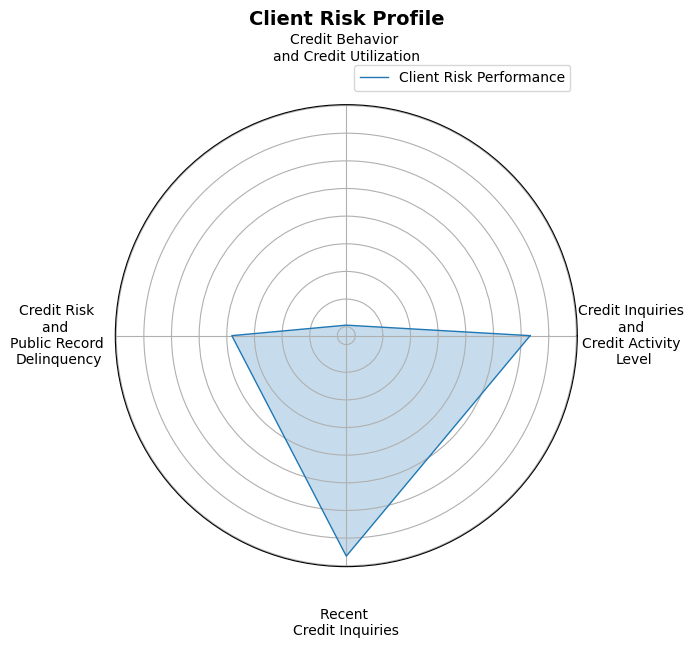

In [600]:
def input_to_radarchart(df): 
    def plot_radar_chart(df):
        categories = df.columns
        num_vars = len(categories)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]      
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        for i, row in df.iterrows():
            row[-2:] = row[-2:] * -1
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid',label="Client Risk Performance")
            
            ax.fill(angles, values, alpha=0.25)

        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        categories = ["Credit Inquiries \nand \nCredit Activity \nLevel",
                            "Credit Behavior \nand Credit Utilization", 
                            "Credit Risk \nand  \nPublic Record \nDelinquency", 
                            "Recent \nCredit Inquiries"]
        ax.set_xticklabels(categories)
        ax.tick_params(axis='x', which='major', pad=30)
        ax.set_title("Client Risk Profile", fontsize=14, fontweight='bold')
        plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1))
        plt.show()
    df = scaler_data.transform(df)
    transformed_data = pd.DataFrame(pca.transform(df))
    plot_radar_chart(transformed_data)
input_to_radarchart(filtered_df.iloc[[89],])

**Credit Inquiries and Credit Activity Level**: This principal component primarily focuses on the number of credit inquiries (NumInqLast6M and NumInqLast6Mexcl7days) and the credit activity level (NumRevolvingTradesWBalance and NumBank2NatlTradesWHighUtilization). A higher PCA1 value may indicate more credit inquiries and a higher credit activity level.

**Credit Behavior and Credit Utilization**: This principal component focuses on the number of satisfactory trades (NumSatisfactoryTrades), credit inquiries (NumInqLast6M and NumInqLast6Mexcl7days), and credit utilization (NumRevolvingTradesWBalance and NumBank2NatlTradesWHighUtilization). A higher PCA2 value may indicate poorer credit behavior and higher credit utilization.

**Credit Risk and Public Record Delinquency**: This principal component focuses on external risk estimates (ExternalRiskEstimate), the number of satisfactory trades (NumSatisfactoryTrades), and public record delinquency (MaxDelq2PublicRecLast12M). A higher PCA3 value may indicate higher credit risk and more public record delinquency.

**Recent Credit Inquiries**: This principal component mainly focuses on recent credit inquiry situations (MSinceMostRecentInqexcl7days) while also involving other variables. A higher PCA4 value may indicate more recent credit inquiries.

In [346]:
with open('pca.p', 'wb') as f:
    pickle.dump(pca, f)

In [501]:
advice = {
'0': {
'good': "You have a low number of credit inquiries and a moderate credit activity level. Continue maintaining good credit management habits.",
'poor': "Be mindful of controlling the number of credit inquiries, as too many inquiries can negatively impact your credit score. Also, maintain an appropriate credit activity level to uphold a healthy credit standing."
},
'1': {
'good': "Your credit behavior is good, and your credit utilization is low. Continue maintaining good credit usage habits.",
'poor': "Try to improve your credit behavior, such as making timely payments, and work on reducing your credit utilization. This will help to improve your credit score."
},
'2': {
'good': "Your credit risk is low, and you have no public record delinquency. Continue maintaining a good credit record.",
'poor': "Strive to lower your credit risk and avoid public record delinquency. Improving these conditions will have a positive impact on your credit score."
},
'3': {
'good': "You have a low number of recent credit inquiries. Maintaining this situation will help uphold a good credit score.",
'poor': "Be mindful of controlling the number of recent credit inquiries, as too many inquiries can negatively impact your credit score. Be cautious when applying for new credit lines."
}
}

In [484]:
input_data = pd.DataFrame(np.array([87, 26, 7, 0, 0, 0, 2, 0]).reshape(1,-1))
df = scaler_data.transform(input_data)
ransformed_data = pd.DataFrame(pca.transform(df))
ransformed_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,0,1,2,3
0,-1.435803,-0.384002,1.202796,-0.248914


In [528]:
principal_components_df

,0,1,2,3
0,-1.435803,-0.384002,1.202796,-0.248914


In [532]:
def provide_advice(principal_components_df):    
    advice_output = {}

    for component in principal_components_df.columns:
        value = principal_components_df.at[0, component]
        
        if component in ['0', '1']:
            if value > 0:
                advice_output[component] = advice[component]['good']
            else:
                advice_output[component] = advice[component]['poor']
        else:
            if value < 0:
                advice_output[component] = advice[component]['good']
            else:
                advice_output[component] = advice[component]['poor']
    advice_list = list(advice_output.values()) 
    advice_sentence = ' '.join(advice_list)
    return advice_sentence



In [531]:
input_data = pd.DataFrame(np.array([87, 26, 7, 0, 0, 0, 2, 0]).reshape(1,-1))
df = scaler_data.transform(input_data)
ransformed_data = pd.DataFrame(pca.transform(df))
principal_components_df = pd.DataFrame(ransformed_data)
principal_components_df.columns = ["0","1","2","3"]
principal_components_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,0,1,2,3
0,-1.435803,-0.384002,1.202796,-0.248914


In [535]:
advice_given = provide_advice(principal_components_df)
print(advice_given)

Be mindful of controlling the number of credit inquiries, as too many inquiries can negatively impact your credit score. Also, maintain an appropriate credit activity level to uphold a healthy credit standing. Try to improve your credit behavior, such as making timely payments, and work on reducing your credit utilization. This will help to improve your credit score. Strive to lower your credit risk and avoid public record delinquency. Improving these conditions will have a positive impact on your credit score. You have a low number of recent credit inquiries. Maintaining this situation will help uphold a good credit score.


Be mindful of controlling the number of credit inquiries, as too many inquiries can negatively impact your credit score. Also, maintain an appropriate credit activity level to uphold a healthy credit standing. Try to improve your credit behavior, such as making timely payments, and work on reducing your credit utilization. This will help to improve your credit score. Strive to lower your credit risk and avoid public record delinquency. Improving these conditions will have a positive impact on your credit score. You have a low number of recent credit inquiries. Maintaining this situation will help uphold a good credit score.


In [522]:
advice_list = list(advice_given.values())

In [523]:
advice_list

['Be mindful of controlling the number of credit inquiries, as too many inquiries can negatively impact your credit score. Also, maintain an appropriate credit activity level to uphold a healthy credit standing.',
 'Try to improve your credit behavior, such as making timely payments, and work on reducing your credit utilization. This will help to improve your credit score.',
 'Strive to lower your credit risk and avoid public record delinquency. Improving these conditions will have a positive impact on your credit score.',
 'You have a low number of recent credit inquiries. Maintaining this situation will help uphold a good credit score.']

In [525]:
advice_sentence = ' '.join(advice_list)
advice_sentence

'Be mindful of controlling the number of credit inquiries, as too many inquiries can negatively impact your credit score. Also, maintain an appropriate credit activity level to uphold a healthy credit standing. Try to improve your credit behavior, such as making timely payments, and work on reducing your credit utilization. This will help to improve your credit score. Strive to lower your credit risk and avoid public record delinquency. Improving these conditions will have a positive impact on your credit score. You have a low number of recent credit inquiries. Maintaining this situation will help uphold a good credit score.'

In [536]:
filtered_df

,ExternalRiskEstimate,NumSatisfactoryTrades,MaxDelq2PublicRecLast12M,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization
0,55.0,20.0,3.0,0.0,0.0,0.0,8.0,1.00000
1,61.0,2.0,0.0,0.0,0.0,0.0,0.0,1.09227
2,67.0,9.0,7.0,0.0,4.0,4.0,4.0,1.00000
3,66.0,28.0,6.0,0.0,5.0,4.0,6.0,3.00000
4,81.0,12.0,7.0,0.0,1.0,1.0,3.0,0.00000
...,...,...,...,...,...,...,...,...
9866,73.0,21.0,6.0,7.0,0.0,0.0,5.0,0.00000
9867,65.0,11.0,6.0,1.0,1.0,1.0,2.0,1.00000
9868,74.0,18.0,6.0,3.0,4.0,4.0,5.0,0.00000
9869,72.0,42.0,6.0,6.0,0.0,0.0,4.0,0.00000


In [541]:
combined_df = pd.concat([filtered_df, Y], axis=1)

In [542]:
combined_df

,ExternalRiskEstimate,NumSatisfactoryTrades,MaxDelq2PublicRecLast12M,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization,RiskPerformance
0,55.0,20.0,3.0,0.0,0.0,0.0,8.0,1.00000,1.0
1,61.0,2.0,0.0,0.0,0.0,0.0,0.0,1.09227,1.0
2,67.0,9.0,7.0,0.0,4.0,4.0,4.0,1.00000,1.0
3,66.0,28.0,6.0,0.0,5.0,4.0,6.0,3.00000,1.0
4,81.0,12.0,7.0,0.0,1.0,1.0,3.0,0.00000,1.0
...,...,...,...,...,...,...,...,...,...
10454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [544]:
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [579]:
aa = filtered_df.columns.tolist()
#aa.append('RiskPerformance')
aa

['ExternalRiskEstimate',
 'NumSatisfactoryTrades',
 'MaxDelq2PublicRecLast12M',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NumRevolvingTradesWBalance',
 'NumBank2NatlTradesWHighUtilization']

In [582]:
dffffff = df[aa]

In [581]:
dffffff[dffffff['RiskPerformance'] == 'Bad']

KeyError: 'RiskPerformance'

In [563]:
dffffff.describe()

,ExternalRiskEstimate,NumSatisfactoryTrades,MaxDelq2PublicRecLast12M,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,19.428052,4.928291,-0.325366,0.868152,0.812602,3.185008,0.018071
std,21.121621,13.004327,3.756275,6.067556,3.179304,3.143698,4.413173,3.358135
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,12.000000,4.000000,-7.000000,0.000000,0.000000,2.000000,0.000000
50%,71.000000,19.000000,6.000000,0.000000,1.000000,1.000000,3.000000,0.000000
75%,79.000000,27.000000,7.000000,1.000000,2.000000,2.000000,5.000000,1.000000
max,94.000000,79.000000,9.000000,24.000000,66.000000,66.000000,32.000000,18.000000


In [578]:
with open('lda_model.p', 'rb') as f2:
    loaded_model = pickle.load(f2)

In [ ]:
loaded_model.fit()

In [292]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(filtered_df)
X_scaler = pd.DataFrame(X_scaler)
merged_df = pd.merge(pd.DataFrame(pca.transform(X_scaler)), Y, left_index=True, right_index=True)
result = merged_df.groupby('RiskPerformance').mean()
result

,0,1,2,3,4
RiskPerformance,,,,,
0,0.023983,0.028717,-0.003241,0.012883,0.032748
1,-0.030375,-0.021860,0.007656,0.032945,-0.027065
